## Importing Libraries

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Defined Functions and Classes

In [102]:
class BayesClassifier:
    def __init__(self):
        pass

    def fit(self, X_train, y_train):
        self.classes, self.class_counts = np.unique(y_train, return_counts=True)
        self.no_of_classes = len(self.classes)
        self.total_data_points = len(y_train)
        self.apriori_probabilities = self.class_counts/self.total_data_points
        self.class_split_training_data = {}
        for c in self.classes:
            self.class_split_training_data[c] = []
            for j in range(len(y_train)):
                if c == y_train[j]:
                    self.class_split_training_data[c].append(X_train[j])
            self.class_split_training_data[c] = np.array(self.class_split_training_data[c])
        self.mean_vectors = []
        for c in self.classes:
            self.mean_vectors.append(np.mean(self.class_split_training_data[c], axis = 0))
        self.covariance_matrices = []
        for c in self.classes:
            self.covariance_matrices.append(np.cov(self.class_split_training_data[c], rowvar=False))
        self.inverse_covariance_matrices = []
        for c in range(len(self.classes)):
            self.inverse_covariance_matrices.append(np.linalg.inv(self.covariance_matrices[c]))
        self.dimensions = len(X_train[0])
        self.det_covariance_matrices = []
        for c in range(len(self.classes)):
            self.det_covariance_matrices.append(np.linalg.det(self.covariance_matrices[c]))

    def predict(self, X_test):
        y_pred = []
        for X in X_test:
            probability_values = {}
            class_count = 0
            for c in self.classes:
                p_xw = np.exp(-0.5 * np.dot(np.dot((X - self.mean_vectors[class_count]).T, self.inverse_covariance_matrices[class_count]), (X - self.mean_vectors[class_count]))) / (((2 * np.pi) ** (self.dimensions / 2)) * np.sqrt(self.det_covariance_matrices[class_count]))
                p_wx = p_xw * self.apriori_probabilities[class_count]
                probability_values[c] = p_wx
                class_count += 1
            y_pred.append(max(probability_values, key=probability_values.get))
        y_pred = np.array(y_pred)
        return y_pred

    def decision_boundary(self, X_train):
        x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
        y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
        y_pred_class = []
        y_pred_val = []
        for i in range(len(xx)):
            y_row_class = []
            y_row_val = []
            for j in range(len(yy[0])):
                X = np.array([xx[i, j], yy[i, j]])
                probability_values = {}
                class_count = 0
                for c in self.classes:
                    p_xw = np.exp(-0.5 * np.dot(np.dot((X - self.mean_vectors[class_count]).T, self.inverse_covariance_matrices[class_count]), (X - self.mean_vectors[class_count]))) / (((2 * np.pi) ** (self.dimensions / 2)) * np.sqrt(self.det_covariance_matrices[class_count]))
                    p_wx = p_xw * self.apriori_probabilities[class_count]
                    probability_values[c] = p_wx
                    class_count += 1
                y_row_class.append(max(probability_values, key=probability_values.get))
                y_row_val.append(max(probability_values.values()))
            y_pred_class.append(y_row_class)
            y_pred_val.append(y_row_val)
        y_pred_class = np.array(y_pred_class)
        y_pred_val = np.array(y_pred_val)
        y_pred = np.array([y_pred_class, y_pred_val])
        return y_pred

## Preprocessing

### Importing Data

In [103]:
dataset = pd.read_csv('iris.csv')
dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


### Test Train Split of Dataset

In [104]:
types = dataset['Species'].unique()
test_df = pd.DataFrame()
train_df = pd.DataFrame()
for t in types:
    type_df = dataset[dataset["Species"] == t]
    train_df = pd.concat([train_df, type_df.iloc[:40]])
    test_df = pd.concat([test_df, type_df.iloc[40:]])

In [105]:
test_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
40,41,5.0,3.5,1.3,0.3,Iris-setosa
41,42,4.5,2.3,1.3,0.3,Iris-setosa
42,43,4.4,3.2,1.3,0.2,Iris-setosa
43,44,5.0,3.5,1.6,0.6,Iris-setosa
44,45,5.1,3.8,1.9,0.4,Iris-setosa
45,46,4.8,3.0,1.4,0.3,Iris-setosa
46,47,5.1,3.8,1.6,0.2,Iris-setosa
47,48,4.6,3.2,1.4,0.2,Iris-setosa
48,49,5.3,3.7,1.5,0.2,Iris-setosa
49,50,5.0,3.3,1.4,0.2,Iris-setosa


In [106]:
train_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
135,136,7.7,3.0,6.1,2.3,Iris-virginica
136,137,6.3,3.4,5.6,2.4,Iris-virginica
137,138,6.4,3.1,5.5,1.8,Iris-virginica
138,139,6.0,3.0,4.8,1.8,Iris-virginica


### Creation of Variables

In [107]:
X_train = train_df.iloc[:, 3:-1].values
X_test = test_df.iloc[:, 3:-1].values
y_train = train_df.iloc[:, -1].values
y_test = test_df.iloc[:, -1].values

In [108]:
print(X_train)

[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [1.7 0.4]
 [1.4 0.3]
 [1.5 0.2]
 [1.4 0.2]
 [1.5 0.1]
 [1.5 0.2]
 [1.6 0.2]
 [1.4 0.1]
 [1.1 0.1]
 [1.2 0.2]
 [1.5 0.4]
 [1.3 0.4]
 [1.4 0.3]
 [1.7 0.3]
 [1.5 0.3]
 [1.7 0.2]
 [1.5 0.4]
 [1.  0.2]
 [1.7 0.5]
 [1.9 0.2]
 [1.6 0.2]
 [1.6 0.4]
 [1.5 0.2]
 [1.4 0.2]
 [1.6 0.2]
 [1.6 0.2]
 [1.5 0.4]
 [1.5 0.1]
 [1.4 0.2]
 [1.5 0.1]
 [1.2 0.2]
 [1.3 0.2]
 [1.5 0.1]
 [1.3 0.2]
 [1.5 0.2]
 [4.7 1.4]
 [4.5 1.5]
 [4.9 1.5]
 [4.  1.3]
 [4.6 1.5]
 [4.5 1.3]
 [4.7 1.6]
 [3.3 1. ]
 [4.6 1.3]
 [3.9 1.4]
 [3.5 1. ]
 [4.2 1.5]
 [4.  1. ]
 [4.7 1.4]
 [3.6 1.3]
 [4.4 1.4]
 [4.5 1.5]
 [4.1 1. ]
 [4.5 1.5]
 [3.9 1.1]
 [4.8 1.8]
 [4.  1.3]
 [4.9 1.5]
 [4.7 1.2]
 [4.3 1.3]
 [4.4 1.4]
 [4.8 1.4]
 [5.  1.7]
 [4.5 1.5]
 [3.5 1. ]
 [3.8 1.1]
 [3.7 1. ]
 [3.9 1.2]
 [5.1 1.6]
 [4.5 1.5]
 [4.5 1.6]
 [4.7 1.5]
 [4.4 1.3]
 [4.1 1.3]
 [4.  1.3]
 [6.  2.5]
 [5.1 1.9]
 [5.9 2.1]
 [5.6 1.8]
 [5.8 2.2]
 [6.6 2.1]
 [4.5 1.7]
 [6.3 1.8]
 [5.8 1.8]
 [6.1 2.5]
 [5.1 2. ]

In [109]:
print(X_test)

[[1.3 0.3]
 [1.3 0.3]
 [1.3 0.2]
 [1.6 0.6]
 [1.9 0.4]
 [1.4 0.3]
 [1.6 0.2]
 [1.4 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [4.4 1.2]
 [4.6 1.4]
 [4.  1.2]
 [3.3 1. ]
 [4.2 1.3]
 [4.2 1.2]
 [4.2 1.3]
 [4.3 1.3]
 [3.  1.1]
 [4.1 1.3]
 [5.6 2.4]
 [5.1 2.3]
 [5.1 1.9]
 [5.9 2.3]
 [5.7 2.5]
 [5.2 2.3]
 [5.  1.9]
 [5.2 2. ]
 [5.4 2.3]
 [5.1 1.8]]


In [110]:
print(y_train)

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versic

In [111]:
print(y_test)

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica']


### Encoding the Dependent Variable

In [112]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [113]:
print(y_train)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2]


In [114]:
print(y_test)

[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]


## Model Creation

In [115]:
bc = BayesClassifier()
bc.fit(X_train, y_train)

## Prediction and Analysis

In [116]:
y_pred = bc.predict(X_test)

In [117]:
final_df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
final_df

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [118]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"The Accuracy of this model is {accuracy*100}%")

The Accuracy of this model is 100.0%


## Plotting

In [119]:
Z = bc.decision_boundary(X_train)

In [120]:
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

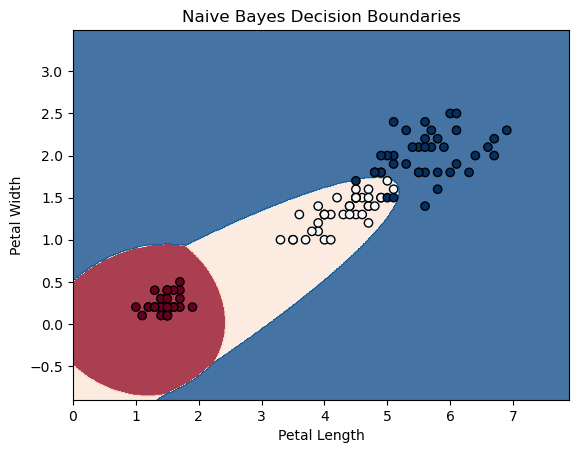

In [123]:
plt.contourf(xx, yy, Z[0], cmap=plt.cm.RdBu, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.RdBu, edgecolor='k')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Naive Bayes Decision Boundaries')
plt.show()

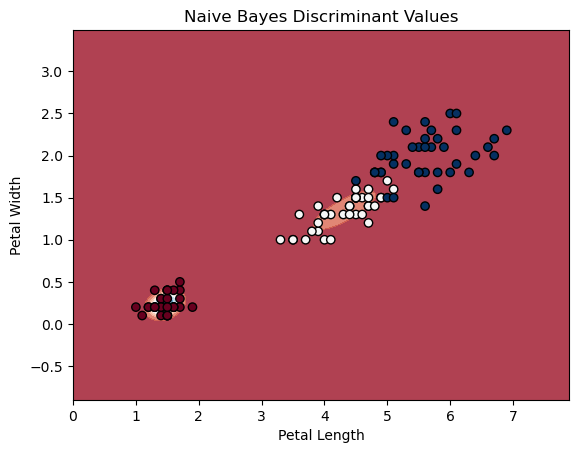

In [125]:
plt.contourf(xx, yy, Z[1], cmap=plt.cm.RdBu, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.RdBu, edgecolor='k')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Naive Bayes Discriminant Values')
plt.show()